# BOGOTÁ,COLOMBIA CENTROS DE GIMNASIO

Ubicaremos los gimnasion en la ciudad de bogota , con el fin de ayudar a ubicar la mejor posicion posible para un nuevo de centro especializado.

Esto lo realizaremos gracias a los datos aportados por foursquare y la pagina de https://es.wikipedia.org/wiki/Anexo:Barrios_de_Bogotá la cual nos traera la unidad de desplazamiento zonal , la cual utilizaremos en nuestros analisis.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
!pip install geopy
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
! pip install folium==0.5.0
import folium 

print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 8.6 MB/s  eta 0:00:01
  Created wheel for folium: file

In [2]:
df=pd.read_html('https://es.wikipedia.org/wiki/Anexo:Barrios_de_Bogot%C3%A1')
bta=df[0]

In [3]:
bta.head()

,Número UPZ,Unidad de Planeamiento Zonal,Localidad,Barrio
0,1,Paseo de los Libertadores,01 Usaquén,"Canaima, La Floresta de La Sabana yTorca."
1,9,Verbenal,01 Usaquén,"Altos de Serrezuela, Balcones de Vista Hermosa..."
2,10,La Uribe,01 Usaquén,"Bosque de San Antonio, Conjunto Camino del Pal..."
3,11,San Cristóbal Norte,01 Usaquén,"Ainsuca, Altablanca, Barrancas, California, Ce..."
4,12,Toberín,01 Usaquén,"El Toberín, Babilonia, Darandelos, Estrella de..."


In [4]:
bta.count()


Número UPZ                      112
Unidad de Planeamiento Zonal    112
Localidad                       112
Barrio                          112
dtype: int64

In [5]:
url_json= 'https://bogota-laburbano.opendatasoft.com/api/records/1.0/search/?dataset=poblacion-upz-bogota&q=&rows=113&facet=nomb_loc'


In [6]:
results = requests.get(url_json).json()
results

{'nhits': 113,
 'parameters': {'dataset': 'poblacion-upz-bogota',
  'timezone': 'UTC',
  'rows': 113,
  'start': 0,
  'format': 'json',
  'facet': ['nomb_loc']},
 'records': [{'datasetid': 'poblacion-upz-bogota',
   'recordid': 'a8f0d8b2c8d24d5ac9533df54672388f8beae093',
   'fields': {'densidad_urbana': 264.024478433,
    'nom_upz': 'SAN CRISTOBAL NORTE',
    'poblacion_urbana': 72680.0,
    'geo_point_2d': [4.736239128708585, -74.02320887418888],
    'area_urbana_en_hectareas_ha': 275.277506205,
    'geo_shape': {'type': 'Polygon',
     'coordinates': [[[-74.0318629239345, 4.742914247232453],
       [-74.02246278282497, 4.741012553750803],
       [-74.02233917669722, 4.741797020145162],
       [-74.02227950596456, 4.743346276179085],
       [-74.02231832678858, 4.745304609369036],
       [-74.02245703351689, 4.746507094559936],
       [-74.02082203030734, 4.746582737893297],
       [-74.02024671810625, 4.746795263017188],
       [-74.0199894464573, 4.746309204526868],
       [-74.0196

In [7]:
barrios = results['records']

In [8]:
barrios[0]

{'datasetid': 'poblacion-upz-bogota',
 'recordid': 'a8f0d8b2c8d24d5ac9533df54672388f8beae093',
 'fields': {'densidad_urbana': 264.024478433,
  'nom_upz': 'SAN CRISTOBAL NORTE',
  'poblacion_urbana': 72680.0,
  'geo_point_2d': [4.736239128708585, -74.02320887418888],
  'area_urbana_en_hectareas_ha': 275.277506205,
  'geo_shape': {'type': 'Polygon',
   'coordinates': [[[-74.0318629239345, 4.742914247232453],
     [-74.02246278282497, 4.741012553750803],
     [-74.02233917669722, 4.741797020145162],
     [-74.02227950596456, 4.743346276179085],
     [-74.02231832678858, 4.745304609369036],
     [-74.02245703351689, 4.746507094559936],
     [-74.02082203030734, 4.746582737893297],
     [-74.02024671810625, 4.746795263017188],
     [-74.0199894464573, 4.746309204526868],
     [-74.01968658228682, 4.7467951602446785],
     [-74.01764815887339, 4.745976709308485],
     [-74.01764625732008, 4.745973280980479],
     [-74.01764220436202, 4.745964421575697],
     [-74.01763644004818, 4.7459523980

In [9]:
# define the dataframe columns
column_names = ['Número UPZ', 'nombre_upz','poblacion_urbana','densidad_urbana', 'Latitude', 'Longitude'] 

# instantiate the dataframe
barrios_bta = pd.DataFrame(columns=column_names)

In [10]:
barrios_bta

,Número UPZ,nombre_upz,poblacion_urbana,densidad_urbana,Latitude,Longitude


In [11]:
for data in barrios:
    borough = neighborhood_name = data['fields']['cod_upz'] 
    neighborhood_name = data['fields']['nom_upz']
    neighborhood_pobla = data['fields']['poblacion_urbana']
    neighborhood_densi = data['fields']['densidad_urbana']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    barrios_bta = barrios_bta.append({'Número UPZ': borough,
                                          'nombre_upz': neighborhood_name,
                                          'poblacion_urbana': neighborhood_pobla,
                                          'densidad_urbana': neighborhood_densi,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon},ignore_index=True)

KeyError: 'poblacion_urbana'

In [12]:
print(barrios_bta.shape)
barrios_bta

(86, 6)


,Número UPZ,nombre_upz,poblacion_urbana,densidad_urbana,Latitude,Longitude
0,11,SAN CRISTOBAL NORTE,72680.0,264.024478,4.736239,-74.023209
1,15,COUNTRY CLUB,24678.0,86.405495,4.710395,-74.043438
2,51,LOS LIBERTADORES,73429.0,201.208701,4.533577,-74.091178
3,52,LA FLORA,18507.0,98.590410,4.507124,-74.089320
4,57,GRAN YOMASA,138142.0,257.824483,4.516033,-74.111005
5,84,BOSA OCCIDENTAL,178960.0,415.818720,4.623987,-74.189566
6,79,CALANDAIMA,68328.0,214.238423,4.648747,-74.162104
7,114,MODELIA,39410.0,150.660579,4.666346,-74.122535
8,74,ENGATIVA,130828.0,222.634972,4.713904,-74.139839
9,104,PARQUE SIMON BOLIVAR-CAN,3404.0,8.538085,4.647776,-74.091330


In [13]:
latitude=4.61
longitude=-74.082

map_bogota = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(barrios_bta['Latitude'], barrios_bta['Longitude'], barrios_bta['nombre_upz']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bogota)  
    
map_bogota

In [14]:
from folium import plugins

latitude=4.61
longitude=-74.082

bogota_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

densidad = plugins.MarkerCluster().add_to(bogota_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(barrios_bta['Latitude'], barrios_bta['Longitude'], barrios_bta['densidad_urbana']):
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label, ).add_to(densidad)

# display map
bogota_map

In [21]:
from matplotlib import pyplot as plot
x= barrios_bta[['nombre_upz','densidad_urbana','poblacion_urbana']]
btatop15=x.sort_values('densidad_urbana',ascending=False)
btatop15.head()

,nombre_upz,densidad_urbana,poblacion_urbana
48,PATIO BONITO,548.796446,174145.0
11,SAN FRANCISCO,426.716438,76213.0
52,EL RINCON,425.307359,302006.0
5,BOSA OCCIDENTAL,415.818720,178960.0
21,EL MINUTO DE DIOS,395.722060,147709.0


In [22]:
top15bta=btatop15[:15]
top15bta

,nombre_upz,densidad_urbana,poblacion_urbana
48,PATIO BONITO,548.796446,174145.0
11,SAN FRANCISCO,426.716438,76213.0
52,EL RINCON,425.307359,302006.0
5,BOSA OCCIDENTAL,415.818720,178960.0
21,EL MINUTO DE DIOS,395.722060,147709.0
80,GRAN BRITALIA,394.125463,70904.0
17,CORABASTOS,375.433248,69277.0
14,20 DE JULIO,351.773156,92353.0
47,TIMIZA,342.204667,147298.0
16,BOSA CENTRAL,309.569740,221236.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ed086dfd0>,
      dtype=object)

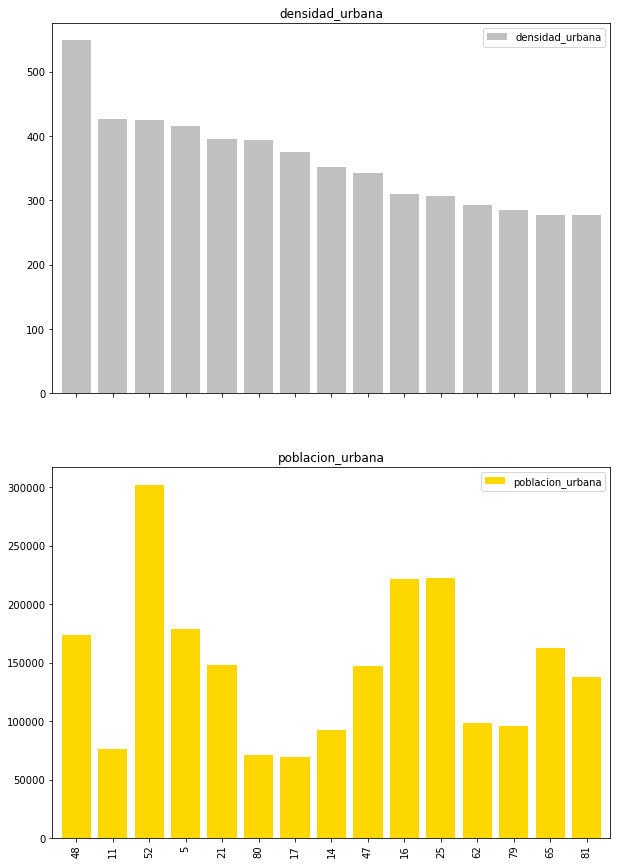

In [23]:

colores = ['#C0C0C0','#FFD700']
top15bta.plot(kind='bar',width=0.8,color=colores, figsize=(10, 15),subplots=True,)



In [24]:
CLIENT_ID = '221UOJEXKIZIABDH4RXEHDNZRCFAYDQ5HPNLNVRYLIOBZCET' # your Foursquare ID
CLIENT_SECRET = 'HDN0FQR15IWDWOEAJONDWHN4R1NLJUP1UV1HPX4VTGNOVMLE'
ACCESS_TOKEN = '1TZ452KREVRR3VIIBVSSDVAYAMIZOSRUCNF34TKAD03NAXTH'# your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
bogota_venues = getNearbyVenues(names=barrios_bta['nombre_upz'],
                                   latitudes=barrios_bta['Latitude'],
                                   longitudes=barrios_bta['Longitude']
                                  )

SAN CRISTOBAL NORTE
COUNTRY CLUB
LOS LIBERTADORES
LA FLORA
GRAN YOMASA
BOSA OCCIDENTAL
CALANDAIMA
MODELIA
ENGATIVA
PARQUE SIMON BOLIVAR-CAN
MUZU
SAN FRANCISCO
VERBENAL
LAS NIEVES
20 DE JULIO
TUNJUELITO
BOSA CENTRAL
CORABASTOS
ZONA FRANCA
CAPELLANIA
LAS FERIAS
EL MINUTO DE DIOS
SANTA CECILIA
LA ACADEMIA
LA ALHAMBRA
TIBABUYES
LOS ANDES
SANTA ISABEL
ZONA INDUSTRIAL
MARRUECOS
LA URIBE
DANUBIO
COMUNEROS
PARQUE ENTRENUBES
TINTAL SUR
TINTAL NORTE
AEROPUERTO EL DORADO
BOYACA REAL
EL PRADO
LOS ALCAZARES
CIUDAD JARDIN
SAN JOSE
JERUSALEM
EL REFUGIO
SAGRADO CORAZON
EL PORVENIR
AMERICAS
TIMIZA
PATIO BONITO
BAVARIA
GUAYMARAL
CASA BLANCA SUBA
EL RINCON
QUINTA PAREDES
RESTREPO
MONTE BLANCO
CHAPINERO
LAS CRUCES
SAN BLAS
FONTIBON SAN PABLO
ALAMOS
SAN JOSE DE BAVARIA
DOCE DE OCTUBRE
TEUSAQUILLO
CIUDAD MONTES
LUCERO
PASEO DE LOS LIBERTADORES
LOS CEDROS
CHICO LAGO
NIZA
LA SABANA
LA CANDELARIA
PARDO RUBIO
LOURDES
LA GLORIA
CIUDAD USME
VENECIA
APOGEO
CASTILLA
KENNEDY CENTRAL
GRAN BRITALIA
FONTIBON
BOLIVIA
JA

In [27]:
print(bogota_venues.shape)
bogota_venues

(1058, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,SAN CRISTOBAL NORTE,4.736239,-74.023209,madamia,4.738146,-74.026838,Dessert Shop
1,SAN CRISTOBAL NORTE,4.736239,-74.023209,Tostao',4.732800,-74.023771,Coffee Shop
2,SAN CRISTOBAL NORTE,4.736239,-74.023209,Dunkin Donuts Cardio Infantil,4.736423,-74.026877,Donut Shop
3,SAN CRISTOBAL NORTE,4.736239,-74.023209,Promar,4.733021,-74.024383,Seafood Restaurant
4,SAN CRISTOBAL NORTE,4.736239,-74.023209,Pecaminosas,4.732686,-74.023699,Salad Place
5,SAN CRISTOBAL NORTE,4.736239,-74.023209,"Ámbar, Tienda Naturista.",4.736186,-74.027347,Health & Beauty Service
6,SAN CRISTOBAL NORTE,4.736239,-74.023209,Vereda Central 156,4.731876,-74.023813,Café
7,COUNTRY CLUB,4.710395,-74.043438,Country Club de Bogotá,4.710217,-74.042388,Golf Course
8,COUNTRY CLUB,4.710395,-74.043438,La Tarta,4.707580,-74.042459,Café
9,LOS LIBERTADORES,4.533577,-74.091178,Kiosko Las Acacias,4.530235,-74.091085,State / Provincial Park


In [28]:
bogota_venues_sca= bogota_venues[['Venue Latitude','Venue Longitude','Venue Category']]
bogota_venues_sca.head()

,Venue Latitude,Venue Longitude,Venue Category
0,4.738146,-74.026838,Dessert Shop
1,4.732800,-74.023771,Coffee Shop
2,4.736423,-74.026877,Donut Shop
3,4.733021,-74.024383,Seafood Restaurant
4,4.732686,-74.023699,Salad Place


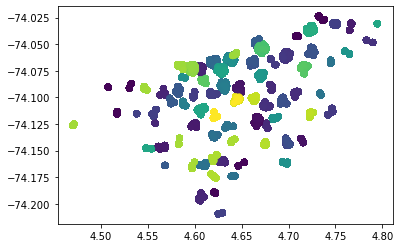

In [30]:
import matplotlib.pyplot as plt
t = np.arange(1058)
for y in zip(bogota_venues_sca['Venue Category'].unique()):
  
 plt.scatter(bogota_venues_sca['Venue Latitude'],bogota_venues_sca['Venue Longitude'],label=y,c=t)


In [32]:
bogota_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
20 DE JULIO,4,4,4,4,4,4
AEROPUERTO EL DORADO,53,53,53,53,53,53
ALAMOS,16,16,16,16,16,16
AMERICAS,30,30,30,30,30,30
APOGEO,5,5,5,5,5,5
BAVARIA,4,4,4,4,4,4
BOLIVIA,14,14,14,14,14,14
BOSA CENTRAL,5,5,5,5,5,5
BOSA OCCIDENTAL,2,2,2,2,2,2


In [33]:
# one hot encoding
bogota_onehot = pd.get_dummies(bogota_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bogota_onehot['Neighborhood'] = bogota_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bogota_onehot.columns[-1]] + list(bogota_onehot.columns[:-1])
bogota_onehot = bogota_onehot[fixed_columns]

bogota_onehot.head()

,Neighborhood,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bakery,Ballroom,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Border Crossing,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Campground,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Duty-free Shop,Electronics Store,Event Service,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Hockey Field,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Latin American Restaurant,Light Rail Station,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nightclub,Office,Optical Shop,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pizza Place,Plaza,Pool,Pub,Public Art,Record Shop,Recording Studio,Recreation Center,Rental Service,Restaurant,Road,Rock Club,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,State / Provincial Park,Stationery Store,Steakhouse,Student Center,Summer Camp,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Theater,Theme Park,Theme Restaurant,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Water Park,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,SAN CRISTOBAL NORTE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,SAN CRISTOBAL NORTE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,SAN CRISTOBAL NORTE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,SAN CRISTOBAL NORTE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [34]:
bogota_grouped = bogota_onehot.groupby('Neighborhood').mean().reset_index()
bogota_grouped

,Neighborhood,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bakery,Ballroom,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Border Crossing,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Campground,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Duty-free Shop,Electronics Store,Event Service,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Hockey Field,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Latin American Restaurant,Light Rail Station,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nightclub,Office,Optical Shop,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pizza Place,Plaza,Pool,Pub,Public Art,Record Shop,Recording Studio,Recreation Center,Rental Service,Restaurant,Road,Rock Club,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,State / Provincial Park,Stationery Store,Steakhouse,Student Center,Summer Camp,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Theater,Theme Park,Theme Restaurant,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Water Park,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,20 DE JULIO,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.250000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.500000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [35]:
num_top_venues = 10

for hood in bogota_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bogota_grouped[bogota_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----20 DE JULIO----
                  venue  freq
0                  Park  0.50
1  Fast Food Restaurant  0.25
2         Burrito Place  0.25
3               Airport  0.00
4                Museum  0.00
5           Music Venue  0.00
6             Nightclub  0.00
7                Office  0.00
8          Optical Shop  0.00
9     Paella Restaurant  0.00


----AEROPUERTO EL DORADO----
              venue  freq
0    Airport Lounge  0.19
1       Coffee Shop  0.09
2  Airport Terminal  0.08
3              Café  0.08
4        Donut Shop  0.04
5   Airport Service  0.04
6       Pizza Place  0.04
7    Cosmetics Shop  0.04
8      Burger Joint  0.04
9         Gift Shop  0.04


----ALAMOS----
               venue  freq
0       Burger Joint  0.19
1         Steakhouse  0.12
2          Hotel Bar  0.06
3          BBQ Joint  0.06
4  Convenience Store  0.06
5              Hotel  0.06
6         Restaurant  0.06
7        Coffee Shop  0.06
8     Sandwich Place  0.06
9           Pharmacy  0.06


----AMERICAS----


               venue  freq
0               Park   1.0
1            Airport   0.0
2      Moving Target   0.0
3          Multiplex   0.0
4             Museum   0.0
5        Music Venue   0.0
6          Nightclub   0.0
7             Office   0.0
8       Optical Shop   0.0
9  Paella Restaurant   0.0


----KENNEDY CENTRAL----
              venue  freq
0              Park  0.17
1       Pizza Place  0.17
2    Farmers Market  0.17
3     Historic Site  0.17
4  Department Store  0.17
5               Gym  0.17
6           Airport  0.00
7            Museum  0.00
8       Music Venue  0.00
9         Nightclub  0.00


----LA ACADEMIA----
                           venue  freq
0             Athletics & Sports   0.5
1                    Music Venue   0.5
2                  Movie Theater   0.0
3                      Multiplex   0.0
4                         Museum   0.0
5                      Nightclub   0.0
6                         Office   0.0
7                   Optical Shop   0.0
8              Pae

                   venue  freq
0     Athletics & Sports  0.25
1                    Gym  0.25
2           Dessert Shop  0.25
3                   Park  0.25
4  Performing Arts Venue  0.00
5                 Museum  0.00
6            Music Venue  0.00
7              Nightclub  0.00
8                 Office  0.00
9           Optical Shop  0.00


----SAN JOSE DE BAVARIA----
               venue  freq
0       Tennis Court   0.5
1       Burger Joint   0.5
2      Movie Theater   0.0
3          Multiplex   0.0
4             Museum   0.0
5        Music Venue   0.0
6          Nightclub   0.0
7             Office   0.0
8       Optical Shop   0.0
9  Paella Restaurant   0.0


----SAN RAFAEL----
            venue  freq
0          Bakery  0.50
1      Restaurant  0.25
2  Sandwich Place  0.25
3         Airport  0.00
4     Pastry Shop  0.00
5          Museum  0.00
6     Music Venue  0.00
7       Nightclub  0.00
8          Office  0.00
9    Optical Shop  0.00


----SANTA CECILIA----
                       

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bogota_grouped['Neighborhood']

for ind in np.arange(bogota_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bogota_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,20 DE JULIO,Park,Burrito Place,Fast Food Restaurant,Dessert Shop,Falafel Restaurant,Exhibit,Event Service,Electronics Store,Duty-free Shop,Dry Cleaner
1,AEROPUERTO EL DORADO,Airport Lounge,Coffee Shop,Café,Airport Terminal,Airport Service,Gift Shop,Fried Chicken Joint,Burger Joint,Donut Shop,Cosmetics Shop
2,ALAMOS,Burger Joint,Steakhouse,Pharmacy,Hotel Bar,Breakfast Spot,Sandwich Place,Restaurant,Italian Restaurant,BBQ Joint,Coffee Shop
3,AMERICAS,Sandwich Place,Fast Food Restaurant,Multiplex,Department Store,Japanese Restaurant,Bar,Donut Shop,Restaurant,Movie Theater,Soccer Stadium
4,APOGEO,BBQ Joint,Martial Arts School,Gym,Fried Chicken Joint,Supermarket,Yoga Studio,Falafel Restaurant,Exhibit,Event Service,Electronics Store


In [38]:
dens= barrios_bta[['nombre_upz','densidad_urbana']]
dens.rename(columns={"nombre_upz": "Neighborhood"}, inplace=True)
bogota_kmean=pd.merge(bogota_grouped,dens,on='Neighborhood')
fixed_columns = [bogota_kmean.columns[-1]] + list(bogota_kmean.columns[:-1])
bogota_kmean = bogota_kmean[fixed_columns]
bogota_kmean.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,densidad_urbana,Neighborhood,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bakery,Ballroom,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Border Crossing,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Campground,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Duty-free Shop,Electronics Store,Event Service,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Hockey Field,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Latin American Restaurant,Light Rail Station,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nightclub,Office,Optical Shop,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pizza Place,Plaza,Pool,Pub,Public Art,Record Shop,Recording Studio,Recreation Center,Rental Service,Restaurant,Road,Rock Club,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,State / Provincial Park,Stationery Store,Steakhouse,Student Center,Summer Camp,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Theater,Theme Park,Theme Restaurant,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Water Park,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,351.773156,20 DE JULIO,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.25,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.123011,AEROPUERTO EL DORADO,0.018868,0.188679,0.037736,0.075472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.018868,0.0,0.0,0.0,0.0,0.018868,0.018868,0.018868,0.0,0.0,0.0,0.018868,0.000000,0.0,0.037736,0.00,0.0,0.0,0.018868,0.075472,0.0,0.018868,0.0,0.0,0.0,0.0,0.0,0.000000,0.094340,0.0,0.0,0.0,0.0,0.0000,0.037736,0.0000,0.0,0.018868,0.0,0.000000,0.0,0.0,0.

In [39]:
from sklearn.preprocessing import StandardScaler
bta_kmean = bogota_kmean.drop('Neighborhood', 1)
X = bta_kmean.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[-0.12233309, -0.11396058, -0.11396058, ..., -0.19178152,
        -0.11396058, -0.12985235],
       [ 0.54727961,  8.77496439,  8.77496439, ..., -0.19178152,
        -0.11396058, -0.12985235],
       [-0.12233309, -0.11396058, -0.11396058, ..., -0.19178152,
        -0.11396058, -0.12985235],
       ...,
       [-0.12233309, -0.11396058, -0.11396058, ..., -0.19178152,
        -0.11396058, -0.12985235],
       [-0.12233309, -0.11396058, -0.11396058, ..., -0.19178152,
        -0.11396058, -0.12985235],
       [-0.12233309, -0.11396058, -0.11396058, ..., -0.19178152,
        -0.11396058, -0.12985235]])

In [50]:
num_clusters = 10

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)



labels[0:10] 

[2 8 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 7 2 2 9 2 2 2 2 2 2 2 2 2 2
 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2 2 2 0 2 1 2 2 2 2 2 2 2 2 2 5 2 2 2
 2 2 2 2]


array([2, 8, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [51]:
bogota_kmean["labels"]=labels
bogota_kmean.head()

,densidad_urbana,Neighborhood,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bakery,Ballroom,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Border Crossing,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Campground,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Duty-free Shop,Electronics Store,Event Service,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Hockey Field,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Latin American Restaurant,Light Rail Station,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nightclub,Office,Optical Shop,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pizza Place,Plaza,Pool,Pub,Public Art,Record Shop,Recording Studio,Recreation Center,Rental Service,Restaurant,Road,Rock Club,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,State / Provincial Park,Stationery Store,Steakhouse,Student Center,Summer Camp,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Theater,Theme Park,Theme Restaurant,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Water Park,Wine Bar,Wings Joint,Women's Store,Yoga Studio,labels
0,351.773156,20 DE JULIO,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.25,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,1.123011,AEROPUERTO EL DORADO,0.018868,0.188679,0.037736,0.075472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.018868,0.0,0.0,0.0,0.0,0.018868,0.018868,0.018868,0.0,0.0,0.0,0.018868,0.000000,0.0,0.037736,0.00,0.0,0.0,0.018868,0.075472,0.0,0.018868,0.0,0.0,0.0,0.0,0.0,0.000000,0.094340,0.0,0.0,0.0,0.0,0.0000,0.037736,0.0000,0.0,0.018868,0.0,0.000000,0

In [52]:

group_labels=bogota_kmean.groupby('labels').mean()
group_labels

,densidad_urbana,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bakery,Ballroom,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Border Crossing,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Campground,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Duty-free Shop,Electronics Store,Event Service,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Hockey Field,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Latin American Restaurant,Light Rail Station,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nightclub,Office,Optical Shop,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pizza Place,Plaza,Pool,Pub,Public Art,Record Shop,Recording Studio,Recreation Center,Rental Service,Restaurant,Road,Rock Club,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,State / Provincial Park,Stationery Store,Steakhouse,Student Center,Summer Camp,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Theater,Theme Park,Theme Restaurant,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Water Park,Wine Bar,Wings Joint,Women's Store,Yoga Studio
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5.620071,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.0

In [54]:
bogota_plot= bogota_venues[['Neighborhood','Venue Latitude','Venue Longitude','Venue Category']]
bogota_plot_label = pd.merge(bogota_plot,bogota_kmean[['Neighborhood','labels']], on ='Neighborhood')
def set_values(row, value):
    return value[row]
   
map ={0 : "red", 1 :"blue", 2 : "green",3:"purple",4:"yellow",5:"gray",6:"brown",7:"black",8:"white",9:"orange"} 
bogota_plot_label['clr'] = bogota_plot_label['labels'].apply(set_values, args =(map, )) 
bogota_plot_label


,Neighborhood,Venue Latitude,Venue Longitude,Venue Category,labels,clr
0,SAN CRISTOBAL NORTE,4.738146,-74.026838,Dessert Shop,2,green
1,SAN CRISTOBAL NORTE,4.732800,-74.023771,Coffee Shop,2,green
2,SAN CRISTOBAL NORTE,4.736423,-74.026877,Donut Shop,2,green
3,SAN CRISTOBAL NORTE,4.733021,-74.024383,Seafood Restaurant,2,green
4,SAN CRISTOBAL NORTE,4.732686,-74.023699,Salad Place,2,green
5,SAN CRISTOBAL NORTE,4.736186,-74.027347,Health & Beauty Service,2,green
6,SAN CRISTOBAL NORTE,4.731876,-74.023813,Café,2,green
7,COUNTRY CLUB,4.710217,-74.042388,Golf Course,2,green
8,COUNTRY CLUB,4.707580,-74.042459,Café,2,green
9,LOS LIBERTADORES,4.530235,-74.091085,State / Provincial Park,2,green


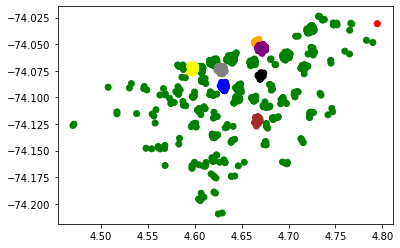

In [62]:
x= bogota_plot_label['Venue Latitude'].values
y= bogota_plot_label['Venue Longitude'].values
color=bogota_plot_label['clr']
plt.scatter(x,y,c=color)



In [60]:
group_labels=bogota_kmean.groupby('labels').mean()
group_labels[['densidad_urbana','Gym','Gym / Fitness Center']]

,densidad_urbana,Gym,Gym / Fitness Center
labels,,,
0,5.620071,0.000000,0.000000
1,155.780813,0.000000,0.000000
2,200.257706,0.032169,0.006140
3,62.234963,0.010000,0.010000
4,116.952210,0.000000,0.000000
5,115.892692,0.000000,0.000000
6,150.660579,0.031250,0.031250
7,293.179189,0.083333,0.000000
8,1.123011,0.000000,0.000000
